# 1. Introduction

In this notebook, we conduct a comprehensive analysis of a dataset that explores the relationship between gaming habits and various mental and physical health indicators. The aim is not only to create meaningful visualizations but also to identify both subtle and significant impacts of excessive gaming.

Objective

To examine patterns in sleep quality, mood, physical health, and social isolation, and evaluate how these factors correlate with gaming hours and levels of addiction risk.

Dataset Overview

* Demographics: Age, Gender
* Gaming Habits: Hours Played, Preferred Genre, Platform Used, Spending
* Health Indicators: Sleep Quality, Anxiety Levels, Physical Pain, Weight Changes
* Outcome Variable: Gaming Addiction Risk Level

This analysis seeks to uncover meaningful relationships that help explain how gaming behavior may influence overall well-being.

# Part 2: Library Import & Data Loading

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
game_df = pd.read_csv('Gaming and Mental Health.csv')
game_df.columns

Index(['record_id', 'age', 'gender', 'daily_gaming_hours', 'game_genre',
       'primary_game', 'gaming_platform', 'sleep_hours', 'sleep_quality',
       'sleep_disruption_frequency', 'academic_work_performance', 'grades_gpa',
       'work_productivity_score', 'mood_state', 'mood_swing_frequency',
       'withdrawal_symptoms', 'loss_of_other_interests',
       'continued_despite_problems', 'eye_strain', 'back_neck_pain',
       'weight_change_kg', 'exercise_hours_weekly', 'social_isolation_score',
       'face_to_face_social_hours_weekly', 'monthly_game_spending_usd',
       'years_gaming', 'gaming_addiction_risk_level'],
      dtype='object')

# 3. Exploratory Data Analysis (EDA)

In [8]:
def generate_null_analysis(df):
    count = df.isnull().sum()
    percen = count / len(df) * 100
    
    df_null = pd.DataFrame({
        'column name': df.columns,
        'total count': count,
        'percentage': percen
    })
    
    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by = 'percentage', ascending = False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    df_filtered.reset_index(drop = True, inplace = True)
    
    return df_filtered

generate_null_analysis(game_df)

,column name,total count,percentage
0,work_productivity_score,326,32.6
1,grades_gpa,246,24.6


In [5]:
game_df.info()
print(game_df.describe())
print(game_df.isnull().sum())

game_df['grades_gpa'].fillna(game_df['grades_gpa'].median(), inplace=True)
game_df['work_productivity_score'].fillna(game_df['work_productivity_score'].median(), inplace=True)

print("Missing values handled.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   record_id                         1000 non-null   object 
 1   age                               1000 non-null   int64  
 2   gender                            1000 non-null   object 
 3   daily_gaming_hours                1000 non-null   float64
 4   game_genre                        1000 non-null   object 
 5   primary_game                      1000 non-null   object 
 6   gaming_platform                   1000 non-null   object 
 7   sleep_hours                       1000 non-null   float64
 8   sleep_quality                     1000 non-null   object 
 9   sleep_disruption_frequency        1000 non-null   object 
 10  academic_work_performance         1000 non-null   object 
 11  grades_gpa                        754 non-null    float64
 12  work_pr

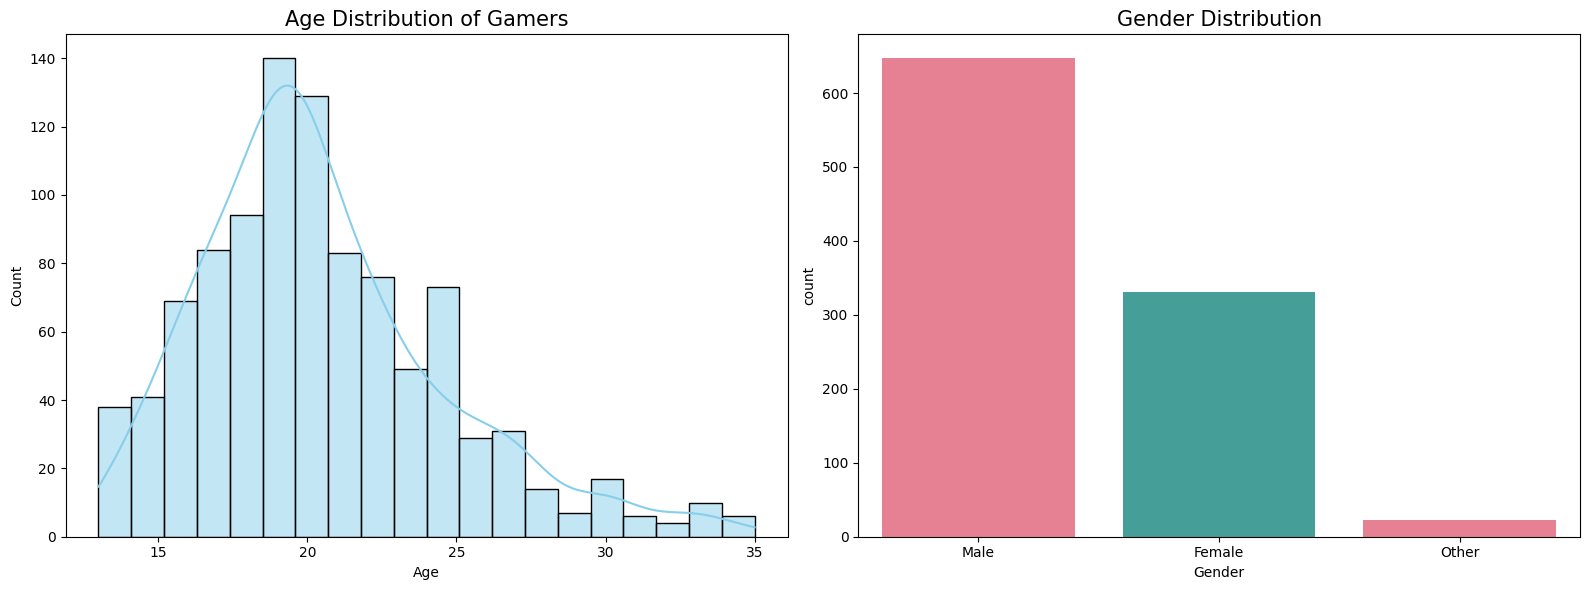

In [ ]:
custom_palette = sns.color_palette("husl", 2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Age Distribution
sns.histplot(game_df['age'], bins=20, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Age Distribution of Gamers', fontsize=15)
ax[0].set_xlabel('Age')

# Plot 2: Gender Distribution
sns.countplot(x='gender', data=game_df, palette=custom_palette, ax=ax[1])
ax[1].set_title('Gender Distribution', fontsize=15)
ax[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()

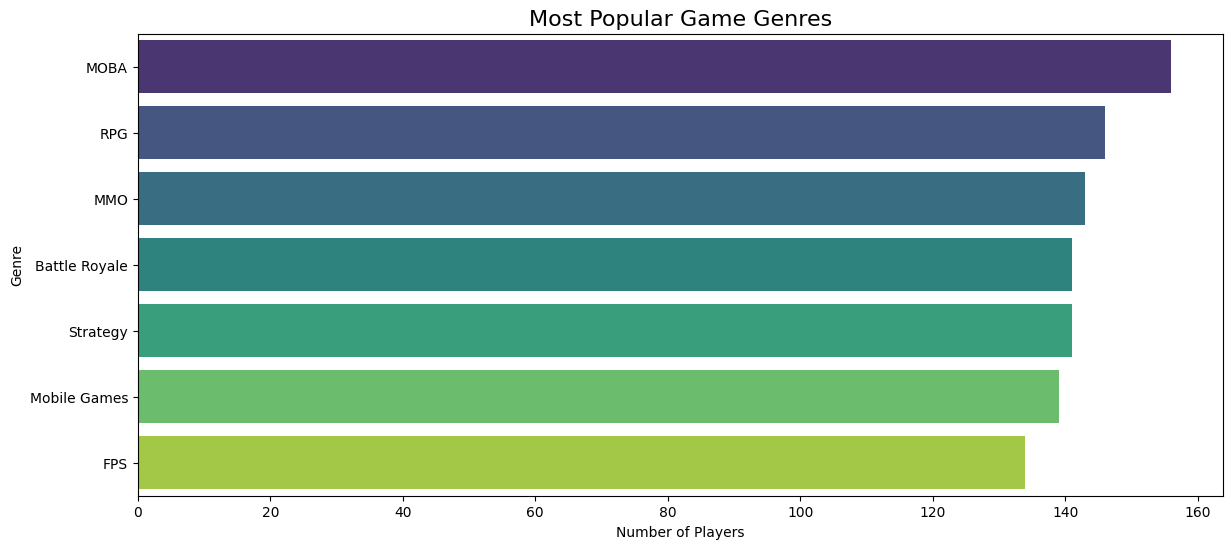

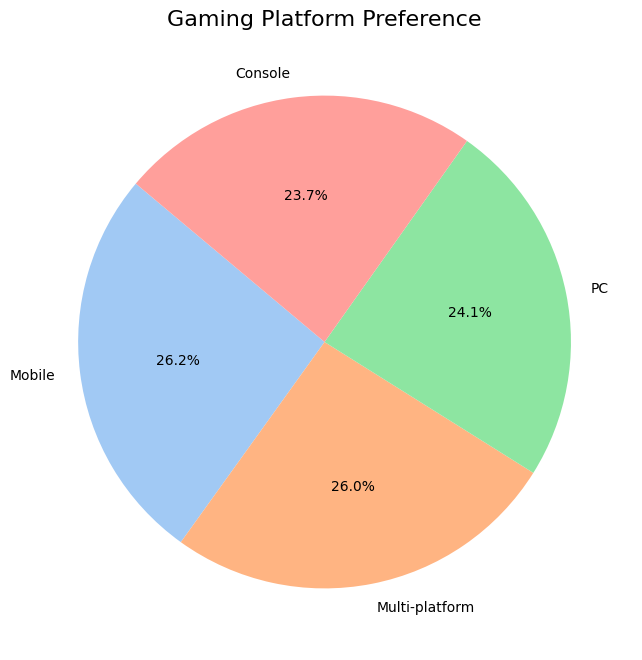

In [ ]:
# Setting a vibrant palette
genre_palette = sns.color_palette("viridis", len(game_df['game_genre'].unique()))

plt.figure(figsize=(14, 6))

# Plotting Game Genre popularity
sns.countplot(y='game_genre', data=game_df, order=game_df['game_genre'].value_counts().index, palette=genre_palette)
plt.title('Most Popular Game Genres', fontsize=16)
plt.xlabel('Number of Players')
plt.ylabel('Genre')
plt.show()

# Platform Preference Pie Chart
platform_counts = game_df['gaming_platform'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Gaming Platform Preference', fontsize=16)
plt.show()

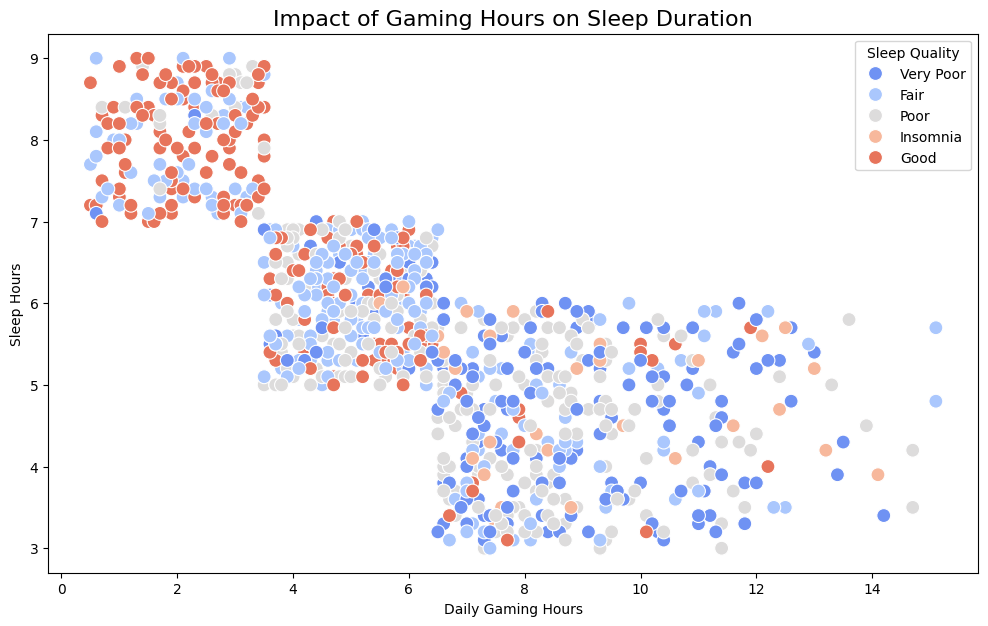

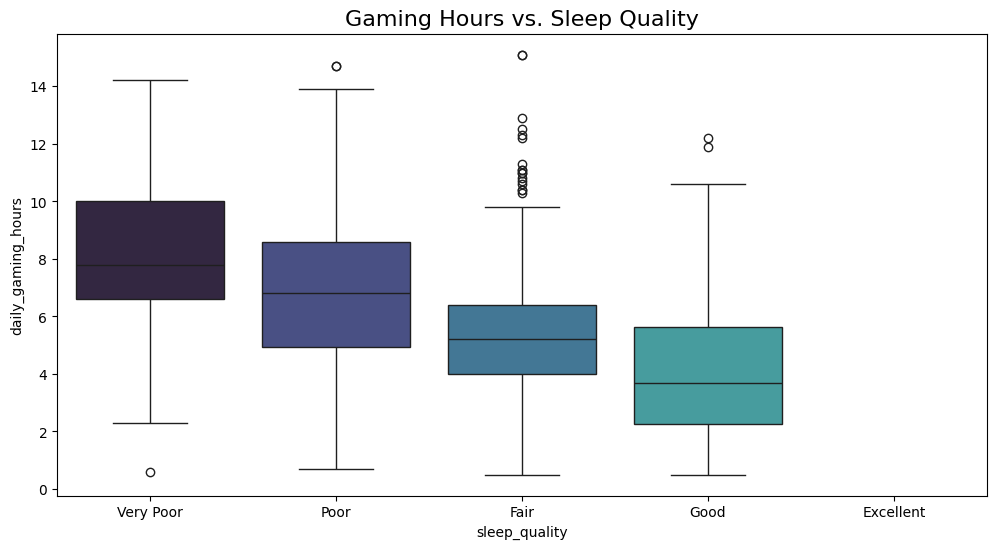

In [ ]:
# Scatter plot with regression line to show correlation
plt.figure(figsize=(12, 7))
sns.scatterplot(x='daily_gaming_hours', y='sleep_hours', hue='sleep_quality', data=game_df, palette='coolwarm', s=100)
plt.title('Impact of Gaming Hours on Sleep Duration', fontsize=16)
plt.xlabel('Daily Gaming Hours')
plt.ylabel('Sleep Hours')
plt.legend(title='Sleep Quality')
plt.show()

# Boxplot for Sleep Quality vs Gaming Hours
plt.figure(figsize=(12, 6))
sns.boxplot(x='sleep_quality', y='daily_gaming_hours', data=game_df, palette="mako", order=['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent'])
plt.title('Gaming Hours vs. Sleep Quality', fontsize=16)
plt.show()

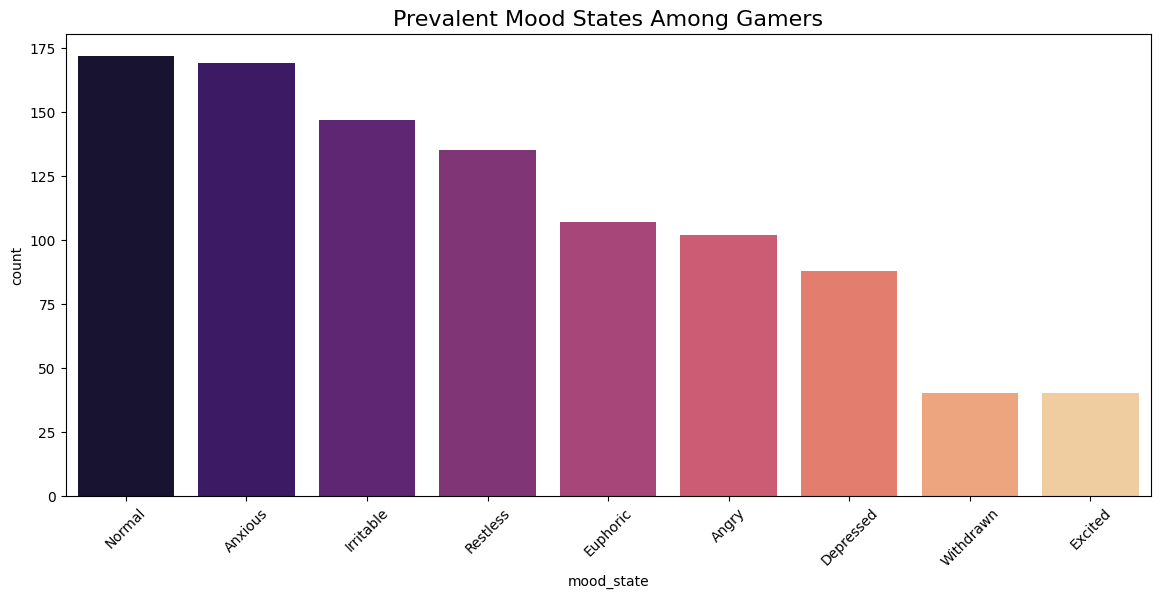

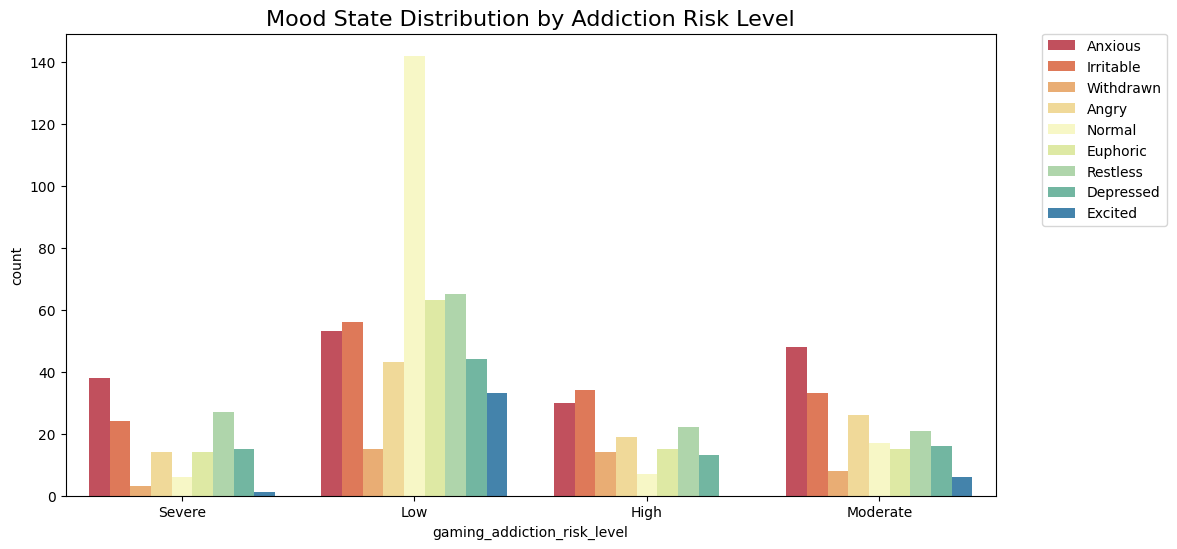

In [12]:
plt.figure(figsize=(14, 6))
sns.countplot(x='mood_state', data=game_df, palette='magma', order=game_df['mood_state'].value_counts().index)
plt.title('Prevalent Mood States Among Gamers', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Interaction between Addiction Risk and Anxiety/Depression symptoms (represented by mood)
plt.figure(figsize=(12, 6))
sns.countplot(x='gaming_addiction_risk_level', hue='mood_state', data=game_df, palette='Spectral')
plt.title('Mood State Distribution by Addiction Risk Level', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

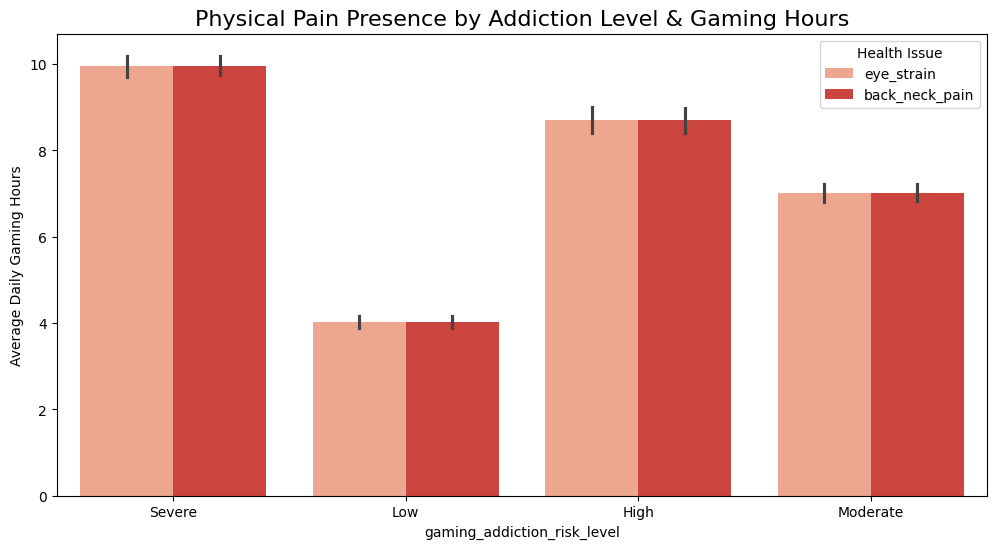

In [13]:
physical_health = game_df[['eye_strain', 'back_neck_pain', 'daily_gaming_hours', 'gaming_addiction_risk_level']]

# Reshaping for visualization
melted_phys = pd.melt(physical_health, id_vars=['daily_gaming_hours', 'gaming_addiction_risk_level'], 
                      value_vars=['eye_strain', 'back_neck_pain'], 
                      var_name='Health Issue', value_name='Presence')

plt.figure(figsize=(12, 6))
sns.barplot(x='gaming_addiction_risk_level', y='daily_gaming_hours', hue='Health Issue', data=melted_phys, palette='Reds')
plt.title('Physical Pain Presence by Addiction Level & Gaming Hours', fontsize=16)
plt.ylabel('Average Daily Gaming Hours')
plt.show()

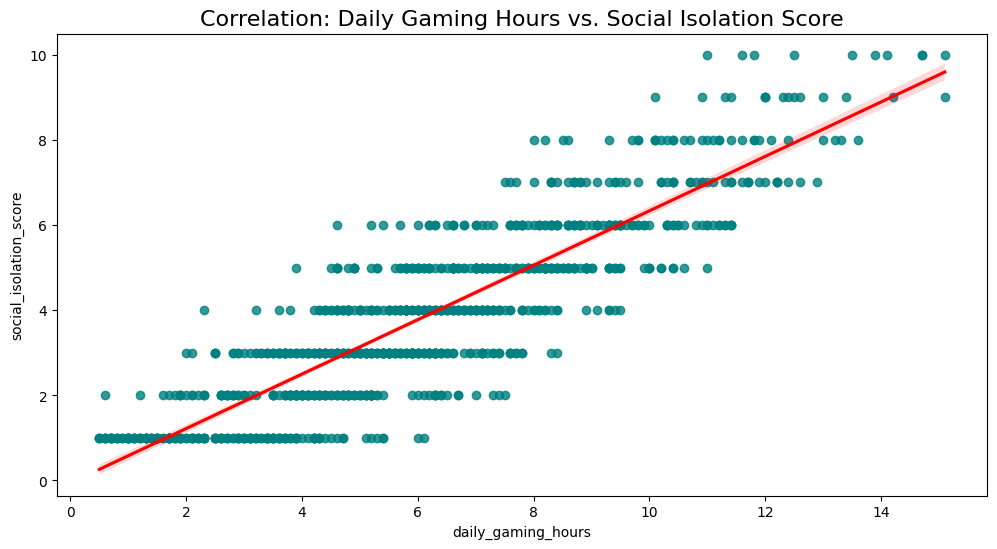

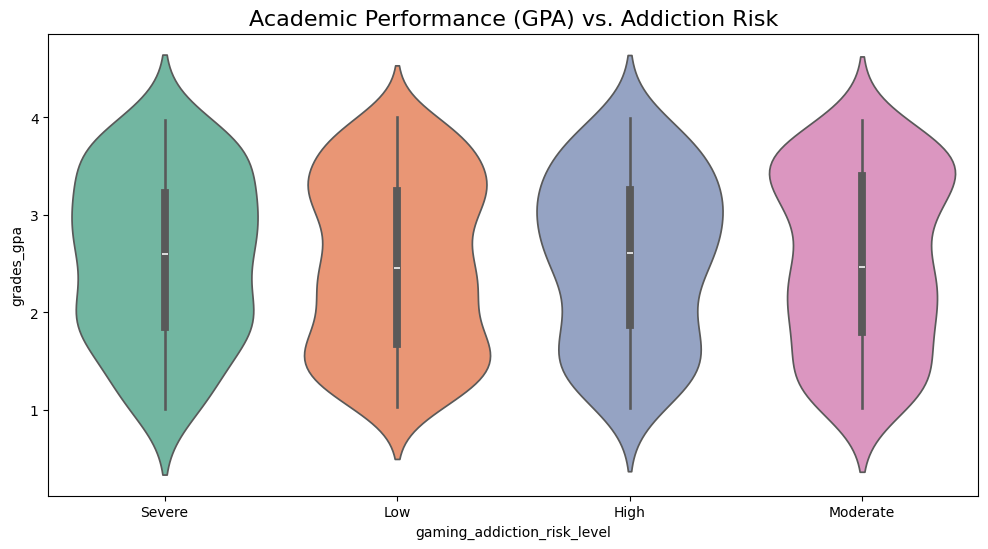

In [14]:
# Social Isolation vs Gaming Hours
plt.figure(figsize=(12, 6))
sns.regplot(x='daily_gaming_hours', y='social_isolation_score', data=game_df, scatter_kws={'color':'teal'}, line_kws={'color':'red'})
plt.title('Correlation: Daily Gaming Hours vs. Social Isolation Score', fontsize=16)
plt.show()

# Impact on Grades (GPA)
plt.figure(figsize=(12, 6))
sns.violinplot(x='gaming_addiction_risk_level', y='grades_gpa', data=game_df, palette='Set2')
plt.title('Academic Performance (GPA) vs. Addiction Risk', fontsize=16)
plt.show()

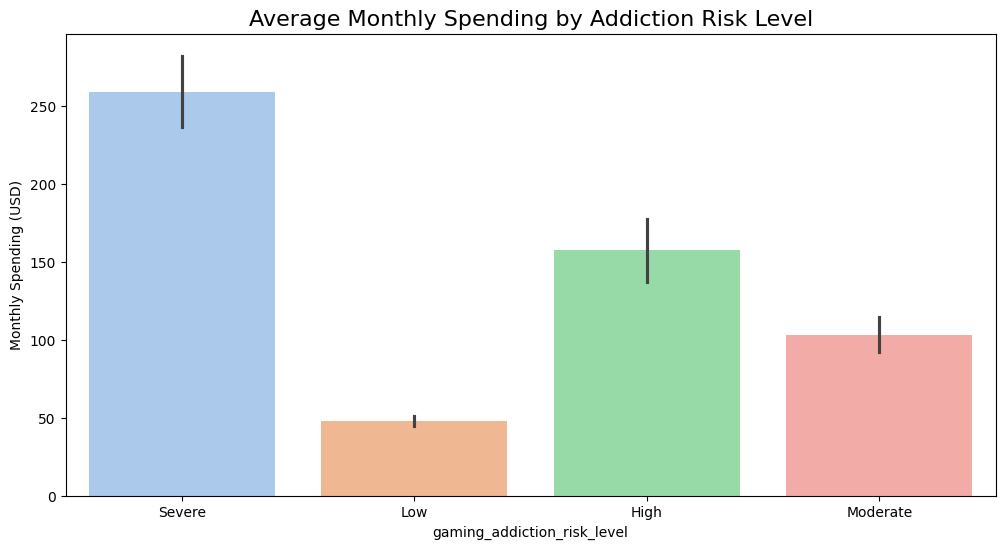

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='gaming_addiction_risk_level', y='monthly_game_spending_usd', data=game_df, palette='pastel')
plt.title('Average Monthly Spending by Addiction Risk Level', fontsize=16)
plt.ylabel('Monthly Spending (USD)')
plt.show()

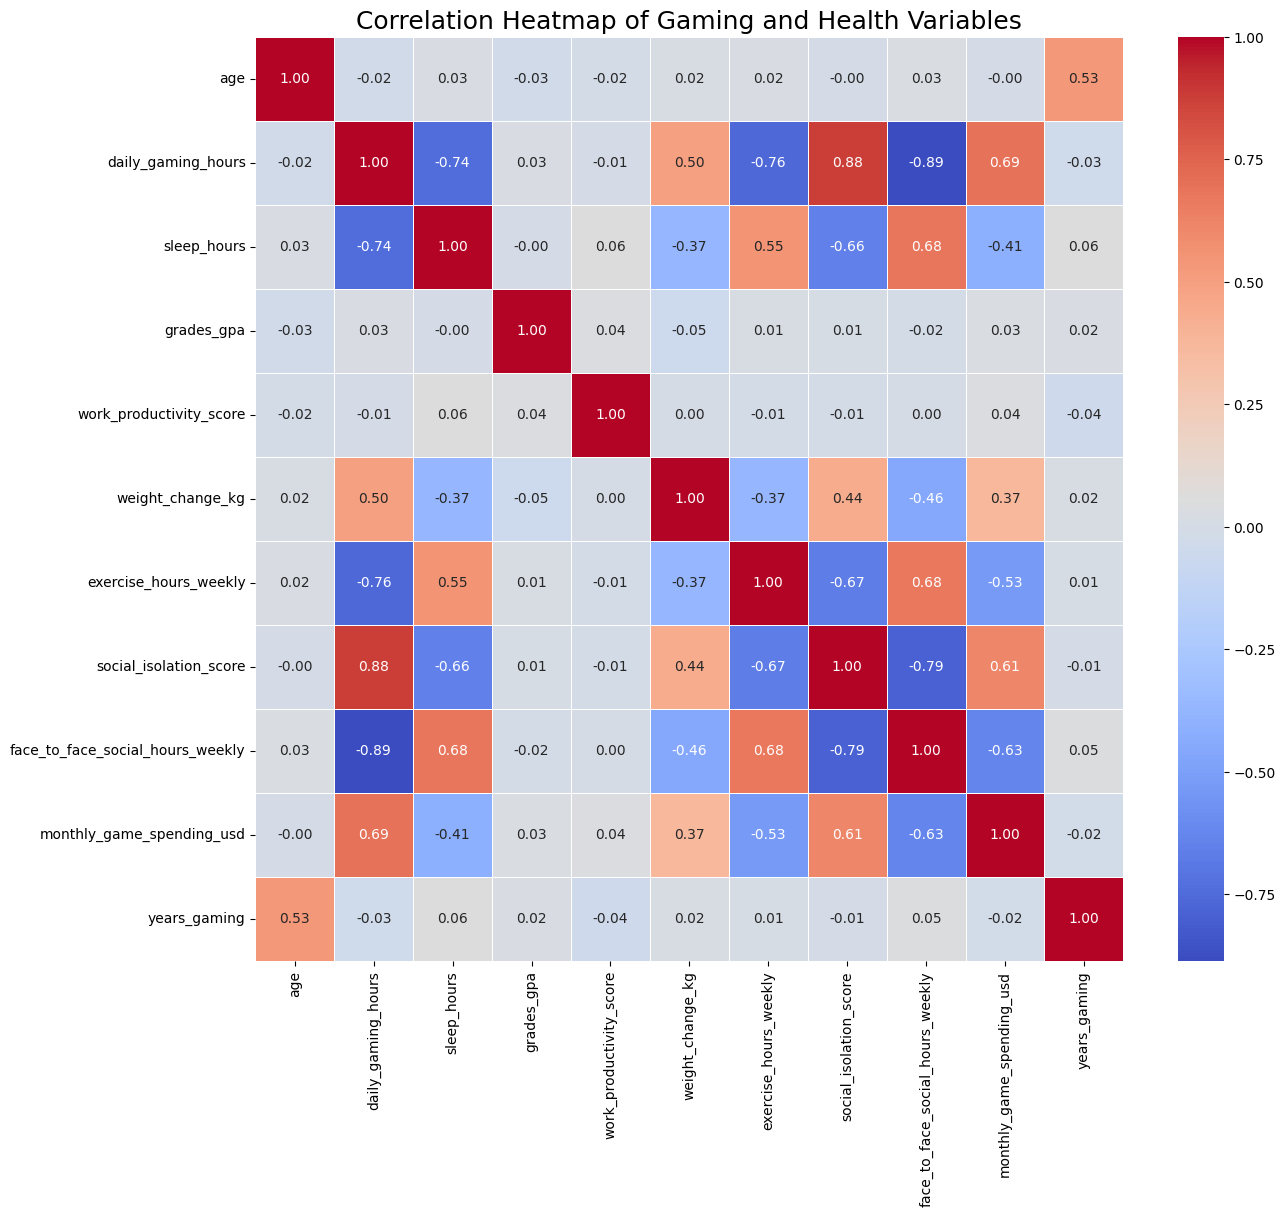

In [17]:
numerical_cols = game_df.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Gaming and Health Variables', fontsize=18)
plt.show()

# 12. Conclusion

This analysis reveals a consistent and compelling pattern: as daily gaming hours increase, negative outcomes across multiple well-being dimensions become more pronounced.

* Sleep Impact: Higher gaming time is strongly associated with poorer sleep quality and reduced sleep duration, suggesting that excessive play may disrupt healthy rest patterns.

* Mental Health Risks: Individuals classified under High and Severe addiction risk levels exhibit significantly greater levels of anxiety and irritability, indicating a clear psychological burden linked to problematic gaming behavior.

* Physical Strain: Reports of eye strain and back pain are markedly higher in the Severe category, highlighting the physical consequences of prolonged screen exposure and sedentary habits.

* Social Withdrawal: Increased gaming hours correlate strongly with elevated social isolation scores, suggesting that excessive engagement may come at the cost of real-world social interaction.

Final Insight

Gaming itself is not inherently harmful; however, the findings emphasize that intensity and duration matter. The Severe addiction risk group consistently demonstrates adverse effects across physical, mental, and social domains. These results reinforce the importance of balanced gaming habits, mindful time management, and early awareness of addiction warning signs to safeguard overall well-being.